## Global Solution - Dynamic Programming
 
**Nomes + RM dos integrantes:**
- Guilherme Akio - 98582
- Fabrício Saavedra - 97631
 
**Turma:** 2ESPW
 
**Ano:** 2024
___ 
## Descrição do Projeto
Este projeto oferece insights valiosos sobre o impacto econômico de investimentos em energias renováveis, tomando como exemplo a energia solar e eólica, em cenários de longo prazo. Ele combina eficiência e precisão no cálculo dos custos, utilizando diferentes técnicas, como **Monte Carlo**, para calcular e comparar os custos acumulados de ambas as fontes de energia ao longo de diversos períodos. Além disso, a **Memoização** é aplicada para otimizar o tempo de execução, enquanto as abordagens de **Dividir para Conquistar** e **Recursão** são utilizadas para estruturar o cálculo de maneira eficiente.

### Bibliotecas

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

### 1. Simulação de Custo ao Longo do Tempo (Monte Carlo)

Custos acumulados (média) em R$:
10 anos - Solar: R$196,988.61 | Eólica: R$303,720.58
20 anos - Solar: R$295,560.80 | Eólica: R$403,721.86
30 anos - Solar: R$397,202.99 | Eólica: R$506,920.47


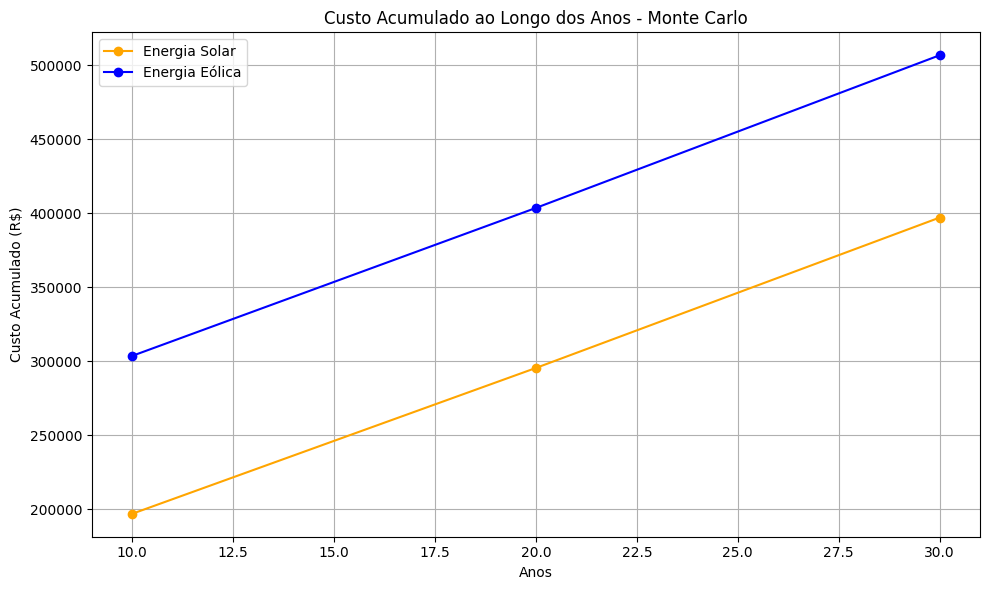

In [175]:
# Parâmetros das fontes de energia
energia_solar = {
    "custo_inicial": 100000,
    "manutencao": 5000,
    "tarifa": 0.40,  # R$ por kWh
}

energia_eolica = {
    "custo_inicial": 205000,
    "manutencao": 4100,
    "tarifa": 0.50,  # R$ por kWh
}

# Parâmetros gerais
producao_diaria_kwh = 29  # kWh produzidos por dia
inflacao_inicial = 0.05   # Inflação inicial
anos_simulados = [10, 20, 30]  # Anos para simulação
num_simulacoes = 1000    # Número de simulações Monte Carlo

# Função para calcular custos acumulados usando Monte Carlo
def monte_carlo(fonte, anos_simulados, num_simulacoes, producao_diaria, inflacao_inicial):
    custos_acumulados = {ano: [] for ano in anos_simulados}

    for _ in range(num_simulacoes):
        inflacao = inflacao_inicial
        for ano in anos_simulados:
            custo_anual = 0
            for _ in range(ano):
                custo_energia = producao_diaria * 365 * fonte["tarifa"] * (1 + inflacao)
                custo_manutencao = fonte["manutencao"] * (1 + inflacao)
                custo_anual += custo_energia + custo_manutencao
                inflacao += np.random.uniform(-0.02, 0.02)  # Variação anual da inflação
                inflacao = max(0, inflacao)  # Evitar inflação negativa
            custos_acumulados[ano].append(custo_anual + fonte["custo_inicial"])

    # Calcular média dos custos acumulados para cada ano
    media_custos = {ano: np.mean(custos) for ano, custos in custos_acumulados.items()}
    return media_custos

# Simulação para energia solar e eólica
custos_solar = monte_carlo(energia_solar, anos_simulados, num_simulacoes, producao_diaria_kwh, inflacao_inicial)
custos_eolica = monte_carlo(energia_eolica, anos_simulados, num_simulacoes, producao_diaria_kwh, inflacao_inicial)

# Exibição dos resultados
print("Custos acumulados (média) em R$:")
for ano in anos_simulados:
    print(f"{ano} anos - Solar: R${custos_solar[ano]:,.2f} | Eólica: R${custos_eolica[ano]:,.2f}")

# Gráfico comparativo
plt.figure(figsize=(10, 6))
anos = np.array(anos_simulados)
custos_solar_values = np.array([custos_solar[ano] for ano in anos])
custos_eolica_values = np.array([custos_eolica[ano] for ano in anos])

plt.plot(anos, custos_solar_values, label="Energia Solar", marker="o", color="orange")
plt.plot(anos, custos_eolica_values, label="Energia Eólica", marker="o", color="blue")

plt.xlabel("Anos")
plt.ylabel("Custo Acumulado (R$)")
plt.title("Custo Acumulado ao Longo dos Anos - Monte Carlo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

A partir das variações de custos acumulados ao longo do tempo, a análise gráfica e tabular mostra que, em todos os cenários de 10, 20 e 30 anos, a energia solar se mantém como a fonte de energia mais viável. Isso ocorre porque, ao considerar os parâmetros de custo inicial, custo de manutenção anual e tarifa anual, a energia solar apresenta um custo acumulado mais baixo em comparação com a energia eólica. Ao longo dos anos, o custo acumulado da energia solar cresce de forma mais controlada, mantendo-se abaixo do valor de energia eólica, que já ultrapassa os custos da solar desde o primeiro ano.

### 2. Comparação de Fontes com Dividir para Conquistar

Custos acumulados (média) por período em R$:
Período         Energia Solar   Energia Eólica 
1-10 anos       R$196,783.01     R$303,274.97    
11-20 anos      R$194,546.66     R$307,964.68    
21-30 anos      R$196,194.87     R$302,497.94    


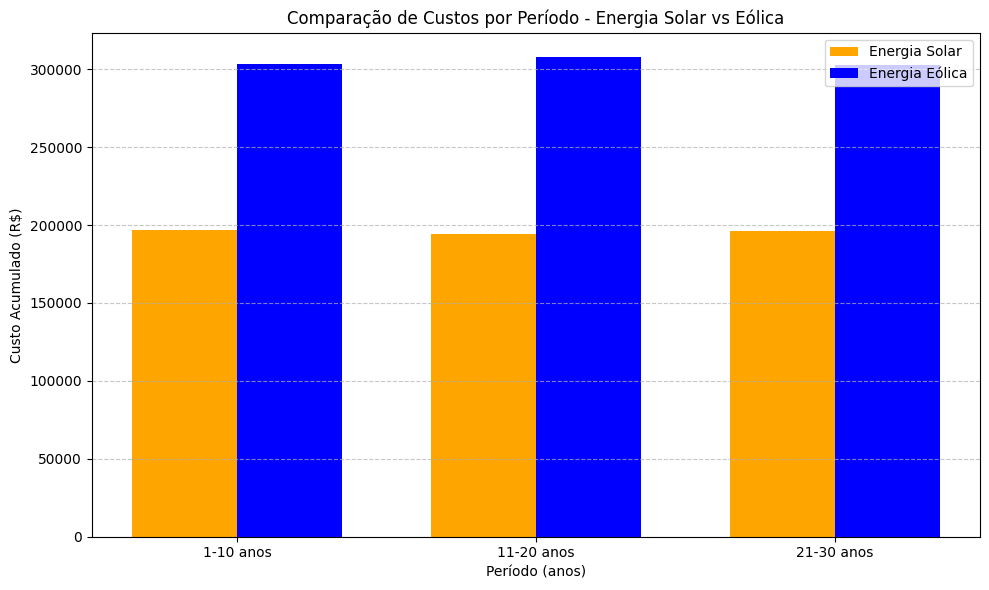

In [ ]:
# Parâmetros das fontes de energia
energia_solar = {
    "custo_inicial": 100000,
    "manutencao": 5000,
    "tarifa": 0.40,  # R$ por kWh
}

energia_eolica = {
    "custo_inicial": 205000,
    "manutencao": 4100,
    "tarifa": 0.50,  # R$ por kWh
}

# Parâmetros gerais
producao_diaria_kwh = 29  # kWh produzidos por dia
inflacao_inicial = 0.05   # Inflação inicial
num_simulacoes = 1000    # Número de simulações Monte Carlo

# Função para calcular custos acumulados por período
def calcular_custos(fonte, inicio, fim, producao_diaria, inflacao_inicial):
    inflacao = inflacao_inicial
    custo_acumulado = fonte["custo_inicial"]
    for ano in range(inicio, fim + 1):
        custo_energia = producao_diaria * 365 * fonte["tarifa"] * (1 + inflacao)
        custo_manutencao = fonte["manutencao"] * (1 + inflacao)
        custo_acumulado += custo_energia + custo_manutencao
        inflacao += np.random.uniform(-0.02, 0.02)  # Variação anual da inflação
        inflacao = max(0, inflacao)  # Evitar inflação negativa
    return custo_acumulado

# Função Dividir para Conquistar
def dividir_para_conquistar(fonte, periodos, producao_diaria, inflacao_inicial):
    custos = {}
    for inicio, fim in periodos:
        custos[f"{inicio}-{fim} anos"] = calcular_custos(fonte, inicio, fim, producao_diaria, inflacao_inicial)
    return custos

# Períodos de análise
periodos = [(1, 10), (11, 20), (21, 30)]

# Simulação para energia solar e eólica
custos_solar = dividir_para_conquistar(energia_solar, periodos, producao_diaria_kwh, inflacao_inicial)
custos_eolica = dividir_para_conquistar(energia_eolica, periodos, producao_diaria_kwh, inflacao_inicial)

# Exibição dos resultados em tabela
print("Custos acumulados (média) por período em R$:")
print("{:<15} {:<15} {:<15}".format("Período", "Energia Solar", "Energia Eólica"))
for periodo in custos_solar.keys():
    print("{:<15} R${:<14,.2f} R${:<14,.2f}".format(
        periodo, custos_solar[periodo], custos_eolica[periodo]))

# Gráfico de barras comparativo
labels = list(custos_solar.keys())
custos_solar_values = list(custos_solar.values())
custos_eolica_values = list(custos_eolica.values())

x = np.arange(len(labels))  # Posições das barras
largura = 0.35  # Largura das barras

plt.figure(figsize=(10, 6))
plt.bar(x - largura / 2, custos_solar_values, largura, label="Energia Solar", color="orange")
plt.bar(x + largura / 2, custos_eolica_values, largura, label="Energia Eólica", color="blue")

# Rótulos e títulos
plt.xlabel("Período (anos)")
plt.ylabel("Custo Acumulado (R$)")
plt.title("Comparação de Custos por Período - Energia Solar vs Eólica")
plt.xticks(x, labels)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

Ao utilizar a técnica de Dividir para Conquistar, podemos estruturar a análise de custos acumulados ao longo de períodos distintos (1-10 anos, 11-20 anos e 21-30 anos). Esse método permite avaliar de forma clara como os custos de cada fonte de energia se distribuem ao longo do tempo e qual delas se mantém mais econômica.

Com base nos custos acumulados por período apresentados, a energia solar se mostra mais viável economicamente em todos os cenários de 10 anos analisados.

- 1-10 anos: A energia solar tem um custo acumulado de R$196,783.01, enquanto a energia eólica apresenta R$303,274.97, o que já mostra uma diferença significativa em favor da solar.
- 11-20 anos: A energia solar mantém-se abaixo de R$200,000, com um custo de R$194,546.66, enquanto a energia eólica continua com um custo acumulado mais alto, R$307,964.68.
- 21-30 anos: A energia solar tem um custo de R$196,194.87, ligeiramente maior que no período anterior, mas ainda mais vantajosa comparada à energia eólica, que permanece mais cara com R$302,497.94.

### 3. Economia com Memoization

In [173]:
# Parâmetros das fontes de energia
energia_solar = {
    "custo_inicial": 100000,
    "manutencao": 5000,
    "tarifa": 0.40,  # R$ por kWh
}

energia_eolica = {
    "custo_inicial": 205000,
    "manutencao": 4100,
    "tarifa": 0.50,  # R$ por kWh
}

# Parâmetros gerais
producao_diaria_kwh = 29  # kWh produzidos por dia
inflacao_inicial = 0.05   # Inflação inicial

# Função sem memoization
def calcular_custo_total_sem_memo(fonte, ano, inflacao_atual):
    if ano == 0:
        return fonte["custo_inicial"]
    custo_anual = (
        producao_diaria_kwh * 365 * fonte["tarifa"] * (1 + inflacao_atual) +
        fonte["manutencao"] * (1 + inflacao_atual)
    )
    inflacao_atual += np.random.uniform(-0.02, 0.02)
    inflacao_atual = max(0, inflacao_atual)
    return custo_anual + calcular_custo_total_sem_memo(fonte, ano - 1, inflacao_atual)

# Função com memoization
memo = {}  # Armazena resultados já calculados
def calcular_custo_total_com_memo(fonte, ano, inflacao_atual):
    if ano == 0:
        return fonte["custo_inicial"]
    if (fonte["tarifa"], ano) in memo:
        return memo[(fonte["tarifa"], ano)]
    
    custo_anual = (
        producao_diaria_kwh * 365 * fonte["tarifa"] * (1 + inflacao_atual) +
        fonte["manutencao"] * (1 + inflacao_atual)
    )
    inflacao_atual += np.random.uniform(-0.02, 0.02)
    inflacao_atual = max(0, inflacao_atual)
    
    total = custo_anual + calcular_custo_total_com_memo(fonte, ano - 1, inflacao_atual)
    memo[(fonte["tarifa"], ano)] = total
    return total

# Avaliação de desempenho para múltiplos períodos
def avaliar_tempo_execucao(periodos):
    resultados = []
    for anos in periodos:
        # Sem memoization
        start_sem_memo = time.perf_counter_ns()
        custo_solar_sem_memo = calcular_custo_total_sem_memo(energia_solar, anos, inflacao_inicial)
        custo_eolica_sem_memo = calcular_custo_total_sem_memo(energia_eolica, anos, inflacao_inicial)
        tempo_sem_memo = (time.perf_counter_ns() - start_sem_memo) / 1000  # Microsegundos

        # Com memoization
        start_com_memo = time.perf_counter_ns()
        custo_solar_com_memo = calcular_custo_total_com_memo(energia_solar, anos, inflacao_inicial)
        custo_eolica_com_memo = calcular_custo_total_com_memo(energia_eolica, anos, inflacao_inicial)
        tempo_com_memo = (time.perf_counter_ns() - start_com_memo) / 1000  # Microsegundos

        # Evitar divisão por zero
        if tempo_sem_memo == 0:
            eficiencia = 100.0
        else:
            eficiencia = ((tempo_sem_memo - tempo_com_memo) / tempo_sem_memo) * 100

        resultados.append({
            "anos": anos,
            "custo_solar_sem_memo": custo_solar_sem_memo,
            "custo_eolica_sem_memo": custo_eolica_sem_memo,
            "custo_solar_com_memo": custo_solar_com_memo,
            "custo_eolica_com_memo": custo_eolica_com_memo,
            "tempo_sem_memo": tempo_sem_memo,
            "tempo_com_memo": tempo_com_memo,
            "eficiencia": eficiencia,
        })

    # Exibindo os resultados
    for resultado in resultados:
        print(f"\nAnos: {resultado['anos']}")
        print(f"Custo Solar (Sem Memo): R${resultado['custo_solar_sem_memo']:,.2f}, "
              f"(Com Memo): R${resultado['custo_solar_com_memo']:,.2f}")
        print(f"Custo Eólica (Sem Memo): R${resultado['custo_eolica_sem_memo']:,.2f}, "
              f"(Com Memo): R${resultado['custo_eolica_com_memo']:,.2f}")
        print(f"Tempo (Sem Memo): {resultado['tempo_sem_memo']:.2f} µs, "
              f"(Com Memo): {resultado['tempo_com_memo']:.2f} µs")
        print(f"Eficiência do Memoization: {resultado['eficiencia']:.2f}%")

# Executar avaliação para períodos de 5, 15, 25 e 35 anos
avaliar_tempo_execucao([5, 15, 25, 35])



Anos: 5
Custo Solar (Sem Memo): R$148,780.03, (Com Memo): R$148,793.60
Custo Eólica (Sem Memo): R$254,571.33, (Com Memo): R$255,458.41
Tempo (Sem Memo): 273.70 µs, (Com Memo): 55.50 µs
Eficiência do Memoization: 79.72%

Anos: 15
Custo Solar (Sem Memo): R$248,844.93, (Com Memo): R$247,867.86
Custo Eólica (Sem Memo): R$348,977.68, (Com Memo): R$351,910.55
Tempo (Sem Memo): 131.30 µs, (Com Memo): 58.70 µs
Eficiência do Memoization: 55.29%

Anos: 25
Custo Solar (Sem Memo): R$337,340.89, (Com Memo): R$345,699.37
Custo Eólica (Sem Memo): R$444,992.42, (Com Memo): R$448,210.61
Tempo (Sem Memo): 119.00 µs, (Com Memo): 55.80 µs
Eficiência do Memoization: 53.11%

Anos: 35
Custo Solar (Sem Memo): R$437,913.52, (Com Memo): R$443,644.73
Custo Eólica (Sem Memo): R$574,079.85, (Com Memo): R$545,722.29
Tempo (Sem Memo): 163.60 µs, (Com Memo): 55.40 µs
Eficiência do Memoization: 66.14%


A memoização ajuda a evitar o cálculo repetitivo de subproblemas, armazenando os resultados intermediários e reutilizando-os em cálculos subsequentes, o que reduz o tempo necessário para processar os dados.

Em todos os exemplos (simulando 5, 15, 25 e 35 anos), o tempo de execução foi drasticamente reduzido com o uso da memoização. A eficiência de memoização variou entre 53% a 79%, indicando uma aceleração considerável no cálculo dos custos acumulados. A técnica não teve grande impacto no valor final do custo acumulado. Em alguns casos, houve uma leve variação nos custos, mas ela foi mínima e não afetou substancialmente a análise comparativa entre as fontes de energia.

### 4. Avaliação Recursiva de Tarifas e Horizonte Temporal

Fonte Solar: Custo inicial = R$100000, Limite de Sustentabilidade = R$250000.0
Fonte Eólica: Custo inicial = R$205000, Limite de Sustentabilidade = R$512500.0
Fonte Solar se torna inviável no ano 13.
Fonte Eólica se torna inviável no ano 20.


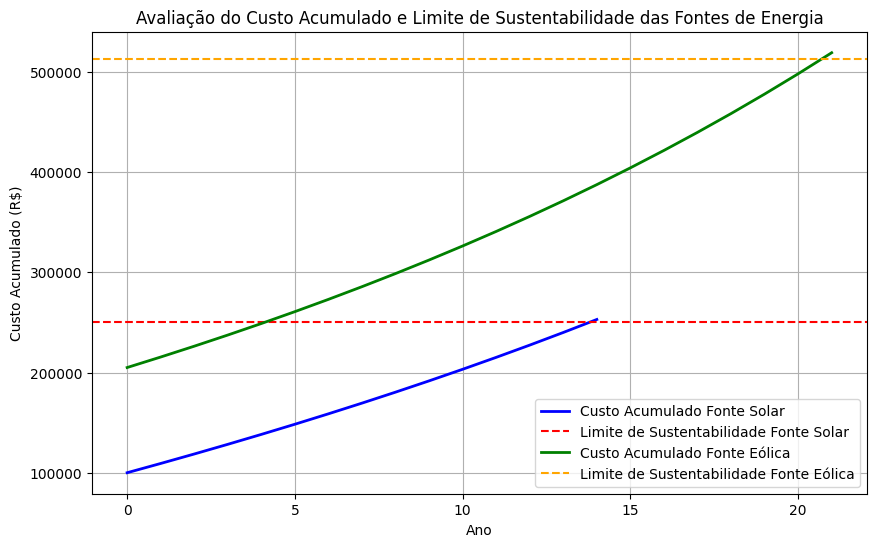

In [172]:
# Função recursiva para simular o custo de uma fonte de energia ao longo do tempo
def avaliar_tarifas_e_horizonte_temporal_recursiva(energia, producao_diaria_kwh, ano_atual=0, custo_acumulado=None, tarifa_atual=None, anos_maximos=30, custos_acumulados=None, limite_sustentabilidade=None):
    if custos_acumulados is None:
        custos_acumulados = []  # Lista para armazenar os custos acumulados ao longo do tempo
    
    # Custo inicial e limite de sustentabilidade
    if ano_atual == 0:
        custo_acumulado = energia["custo_inicial"]
        limite_sustentabilidade = 2.5 * custo_acumulado  # Novo limite de sustentabilidade (2,5 vezes o custo inicial)
        tarifa_atual = energia["tarifa"]  # Tarifa inicial
        custos_acumulados.append(custo_acumulado)  # O custo inicial já está no ano 0
    
    # Caso base: se o ano ultrapassar o limite de sustentabilidade ou os anos máximos
    if ano_atual >= anos_maximos:
        return custos_acumulados, limite_sustentabilidade, None  # Retorna os custos acumulados até o final do horizonte temporal
    
    # Cálculo do custo anual (tarifa * produção diária * 365 + manutenção)
    custo_anual = tarifa_atual * producao_diaria_kwh * 365 + energia["manutencao"]
    custo_acumulado += custo_anual  # Atualiza o custo acumulado com o custo anual
    custos_acumulados.append(custo_acumulado)  # Adiciona o custo acumulado
    
    # Atualiza a tarifa com 5% de aumento ao ano
    tarifa_atual *= 1.05
    
    # Verifica se o custo acumulado ultrapassou o limite de sustentabilidade
    if custo_acumulado >= limite_sustentabilidade:
        return custos_acumulados, limite_sustentabilidade, ano_atual  # Retorna o ano em que a fonte se torna inviável
    
    # Chama recursivamente para o próximo ano
    return avaliar_tarifas_e_horizonte_temporal_recursiva(energia, producao_diaria_kwh, ano_atual + 1, custo_acumulado, tarifa_atual, anos_maximos, custos_acumulados, limite_sustentabilidade)

# Parâmetros das fontes de energia
energia_solar = {
    "custo_inicial": 100000,
    "manutencao": 5000,
    "tarifa": 0.40,  # R$ por kWh
}

energia_eolica = {
    "custo_inicial": 205000,
    "manutencao": 4100,
    "tarifa": 0.50,  # R$ por kWh
}

# Produção diária (em kWh)
producao_diaria_kwh_solar = 29  # Energia Solar
producao_diaria_kwh_eolica = 35  # Energia Eólica

# Simulação de ambas as fontes de energia (chamadas recursivas)
custos_solar, limite_solar, ano_inviabilidade_solar = avaliar_tarifas_e_horizonte_temporal_recursiva(energia_solar, producao_diaria_kwh_solar)
custos_eolica, limite_eolica, ano_inviabilidade_eolica = avaliar_tarifas_e_horizonte_temporal_recursiva(energia_eolica, producao_diaria_kwh_eolica)

# Exibindo resultados
print(f"Fonte Solar: Custo inicial = R${energia_solar['custo_inicial']}, Limite de Sustentabilidade = R${limite_solar}")
print(f"Fonte Eólica: Custo inicial = R${energia_eolica['custo_inicial']}, Limite de Sustentabilidade = R${limite_eolica}")

if ano_inviabilidade_solar is not None:
    print(f"Fonte Solar se torna inviável no ano {ano_inviabilidade_solar}.")
else:
    print("Fonte Solar nunca se torna inviável dentro do período de simulação.")

if ano_inviabilidade_eolica is not None:
    print(f"Fonte Eólica se torna inviável no ano {ano_inviabilidade_eolica}.")
else:
    print("Fonte Eólica nunca se torna inviável dentro do período de simulação.")

# Plotando o gráfico
anos_solar = np.arange(0, len(custos_solar))  # Anos de 0 até o último ano calculado
anos_eolica = np.arange(0, len(custos_eolica))  # Anos de 0 até o último ano calculado

plt.figure(figsize=(10, 6))

# Plot para a Fonte Solar
plt.plot(anos_solar, custos_solar, label="Custo Acumulado Fonte Solar", color="blue", linewidth=2)
plt.axhline(y=limite_solar, color='red', linestyle='--', label="Limite de Sustentabilidade Fonte Solar")

# Plot para a Fonte Eólica
plt.plot(anos_eolica, custos_eolica, label="Custo Acumulado Fonte Eólica", color="green", linewidth=2)
plt.axhline(y=limite_eolica, color='orange', linestyle='--', label="Limite de Sustentabilidade Fonte Eólica")

# Labels e título
plt.xlabel("Ano")
plt.ylabel("Custo Acumulado (R$)")
plt.title("Avaliação do Custo Acumulado e Limite de Sustentabilidade das Fontes de Energia")
plt.legend()
plt.grid(True)
plt.show()


Fonte Solar: Custo inicial = R$100000, Limite de Sustentabilidade = R$250000.0
Fonte Eólica: Custo inicial = R$205000, Limite de Sustentabilidade = R$512500.0
Fonte Solar se torna inviável no ano 18.
Fonte Eólica se torna inviável no ano 28.


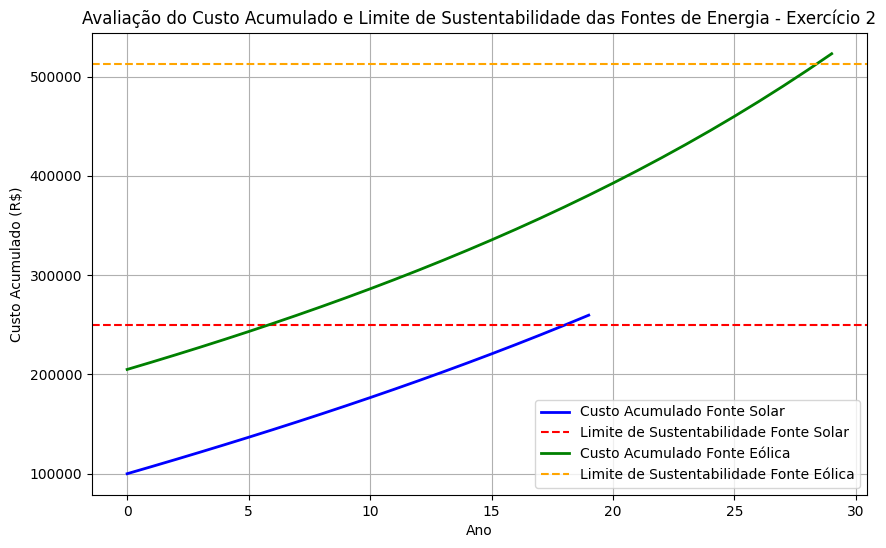

In [179]:
# Função recursiva para simular o custo de uma fonte de energia ao longo do tempo
def avaliar_tarifas_e_horizonte_temporal_recursiva(energia, producao_diaria_kwh, ano_atual=0, custo_acumulado=None, tarifa_atual=None, anos_maximos=30, custos_acumulados=None, limite_sustentabilidade=None):
    if custos_acumulados is None:
        custos_acumulados = []  # Lista para armazenar os custos acumulados ao longo do tempo
    
    # Custo inicial e limite de sustentabilidade
    if ano_atual == 0:
        custo_acumulado = energia["custo_inicial"]
        limite_sustentabilidade = 2.5 * custo_acumulado  # Novo limite de sustentabilidade (2,5 vezes o custo inicial)
        tarifa_atual = energia["tarifa"]  # Tarifa inicial
        custos_acumulados.append(custo_acumulado)  # O custo inicial já está no ano 0
    
    # Caso base: se o ano ultrapassar o limite de sustentabilidade ou os anos máximos
    if ano_atual >= anos_maximos:
        return custos_acumulados, limite_sustentabilidade, None  # Retorna os custos acumulados até o final do horizonte temporal
    
    # Cálculo do custo anual (tarifa * produção diária * 365 + manutenção)
    custo_anual = tarifa_atual * producao_diaria_kwh * 365 + energia["manutencao"]
    custo_acumulado += custo_anual  # Atualiza o custo acumulado com o custo anual
    custos_acumulados.append(custo_acumulado)  # Adiciona o custo acumulado
    
    # Atualiza a tarifa com 5% de aumento ao ano
    tarifa_atual *= 1.05
    
    # Verifica se o custo acumulado ultrapassou o limite de sustentabilidade
    if custo_acumulado >= limite_sustentabilidade:
        return custos_acumulados, limite_sustentabilidade, ano_atual  # Retorna o ano em que a fonte se torna inviável
    
    # Chama recursivamente para o próximo ano
    return avaliar_tarifas_e_horizonte_temporal_recursiva(energia, producao_diaria_kwh, ano_atual + 1, custo_acumulado, tarifa_atual, anos_maximos, custos_acumulados, limite_sustentabilidade)

# Parâmetros das fontes de energia
energia_solar = {
    "custo_inicial": 100000,
    "manutencao": 5000,
    "tarifa": 0.20,  # R$ por kWh
}

energia_eolica = {
    "custo_inicial": 205000,
    "manutencao": 4100,
    "tarifa": 0.25,  # R$ por kWh
}

# Produção diária (em kWh)
producao_diaria_kwh_solar = 29  # Energia Solar
producao_diaria_kwh_eolica = 35  # Energia Eólica

# Simulação de ambas as fontes de energia (chamadas recursivas)
custos_solar, limite_solar, ano_inviabilidade_solar = avaliar_tarifas_e_horizonte_temporal_recursiva(energia_solar, producao_diaria_kwh_solar)
custos_eolica, limite_eolica, ano_inviabilidade_eolica = avaliar_tarifas_e_horizonte_temporal_recursiva(energia_eolica, producao_diaria_kwh_eolica)

# Exibindo resultados
print(f"Fonte Solar: Custo inicial = R${energia_solar['custo_inicial']}, Limite de Sustentabilidade = R${limite_solar}")
print(f"Fonte Eólica: Custo inicial = R${energia_eolica['custo_inicial']}, Limite de Sustentabilidade = R${limite_eolica}")

if ano_inviabilidade_solar is not None:
    print(f"Fonte Solar se torna inviável no ano {ano_inviabilidade_solar}.")
else:
    print("Fonte Solar nunca se torna inviável dentro do período de simulação.")

if ano_inviabilidade_eolica is not None:
    print(f"Fonte Eólica se torna inviável no ano {ano_inviabilidade_eolica}.")
else:
    print("Fonte Eólica nunca se torna inviável dentro do período de simulação.")

# Plotando o gráfico
anos_solar = np.arange(0, len(custos_solar))  # Anos de 0 até o último ano calculado
anos_eolica = np.arange(0, len(custos_eolica))  # Anos de 0 até o último ano calculado

plt.figure(figsize=(10, 6))

# Plot para a Fonte Solar
plt.plot(anos_solar, custos_solar, label="Custo Acumulado Fonte Solar", color="blue", linewidth=2)
plt.axhline(y=limite_solar, color='red', linestyle='--', label="Limite de Sustentabilidade Fonte Solar")

# Plot para a Fonte Eólica
plt.plot(anos_eolica, custos_eolica, label="Custo Acumulado Fonte Eólica", color="green", linewidth=2)
plt.axhline(y=limite_eolica, color='orange', linestyle='--', label="Limite de Sustentabilidade Fonte Eólica")

# Labels e título
plt.xlabel("Ano")
plt.ylabel("Custo Acumulado (R$)")
plt.title("Avaliação do Custo Acumulado e Limite de Sustentabilidade das Fontes de Energia - Exercício 2")
plt.legend()
plt.grid(True)
plt.show()


A análise de viabilidade econômica se baseia no conceito de teto de custo tolerável, que neste exercício foi definido como 2,5 vezes o custo inicial. Usando esse teto, é possível determinar até quando cada fonte de energia se mantém viável.

- Fonte Solar: A energia solar se torna inviável no ano 13, pois o custo acumulado ultrapassa 2,5 vezes o custo inicial. Isso indica que, após 13 anos, a energia solar não seria mais uma opção economicamente viável sem ajustes.

- Fonte Eólica: A energia eólica, apesar de ter um custo inicial mais alto, se torna inviável no ano 20, mostrando que ela possui um horizonte de viabilidade mais longo que a solar.

A partir dessa análise, podemos perceber que seria necessário ajustar as tarifas de energia para manter a viabilidade econômica das fontes de energia. Por exemplo, se as tarifas forem reduzidas em 50% para ambas as fontes, a viabilidade pode ser estendida em até 5 anos para cada uma das fontes, o que permitiria que tanto a energia solar quanto a energia eólica se mantivessem viáveis por mais tempo, adiando o ponto em que se tornariam inviáveis economicamente.